## Exam 2 (Due April 17, 2018 at 11:59 pm)

Please read each question carefully and apply the necessary exploratory analysis to each data set, as well as test for the assumptions relevant to each method when appropriate.

Write the answers in the space provided below each question.

$1$. Small sample sizes affects accuracy of a one tail t-test because it resembles a normal distribution.

a. True

b. False

**ANSWER**<br>
**a. True**

$2$. Data on 102 male and 100 female athletes were collected at the Australian Institute of Sport. The data are  in the file ais.txt.

Develop a logistic regression model for gender ( y = 1 corresponds to female) or ( y = 0 corresponds to male) based on the following predictors (which is a subset of those available):

- RCC, read cell count
- WCC, white cell count
- BMI, body mass index
 
Remember to check for the model assumptions.

In [2]:
# First, plot the data
df <- read.csv('ais.txt', sep=' ')
head(df)

Sex,Ht,Wt,LBM,RCC,WCC,Hc,Hg,Ferr,BMI,SSF,Bfat,Label,Sport,X
1,195.9,78.9,63.32,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,f-b_ball,b_ball,NA
1,189.7,74.4,58.55,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,f-b_ball,b_ball,NA
1,177.8,69.1,55.36,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,f-b_ball,b_ball,NA
1,185.0,74.9,57.18,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,f-b_ball,b_ball,NA
1,184.6,64.6,53.20,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,f-b_ball,b_ball,NA
1,174.0,63.7,53.77,4.10,4.4,37.4,12.5,42,21.04,75.2,15.58,f-b_ball,b_ball,NA


In [14]:
# This shows one clear outlier. We'll take out
# plot(df$RCC)

In [15]:
df <- df[df$RCC < 6.0,]
# plot(df$RCC)

In [16]:
#plot(df$WCC)

In [10]:
df <- df[df$WCC < 12,]

In [17]:
#plot(df$BMI)

In [27]:
#library("mosaic")
model <- glm(Sex ~ RCC + WCC + BMI, family = "binomial", data = df)
msummary(model)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 28.96248    3.93685   7.357 1.88e-13 ***
RCC         -5.44018    0.74705  -7.282 3.28e-13 ***
WCC          0.28744    0.15106   1.903  0.05707 .  
BMI         -0.23429    0.08826  -2.654  0.00794 ** 

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 273.09  on 196  degrees of freedom
Residual deviance: 142.82  on 193  degrees of freedom
AIC: 150.82

Number of Fisher Scoring iterations: 5

`geom_smooth()` using method = 'loess'


[[1]]


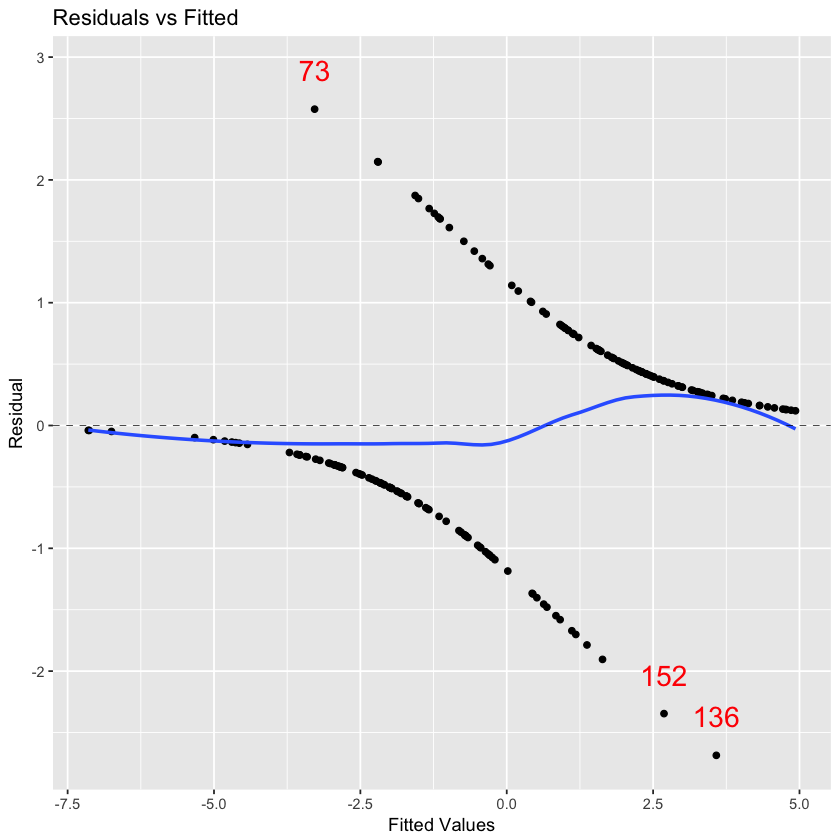

In [28]:
mplot(model, which = 1, system = "ggplot2")

[[1]]


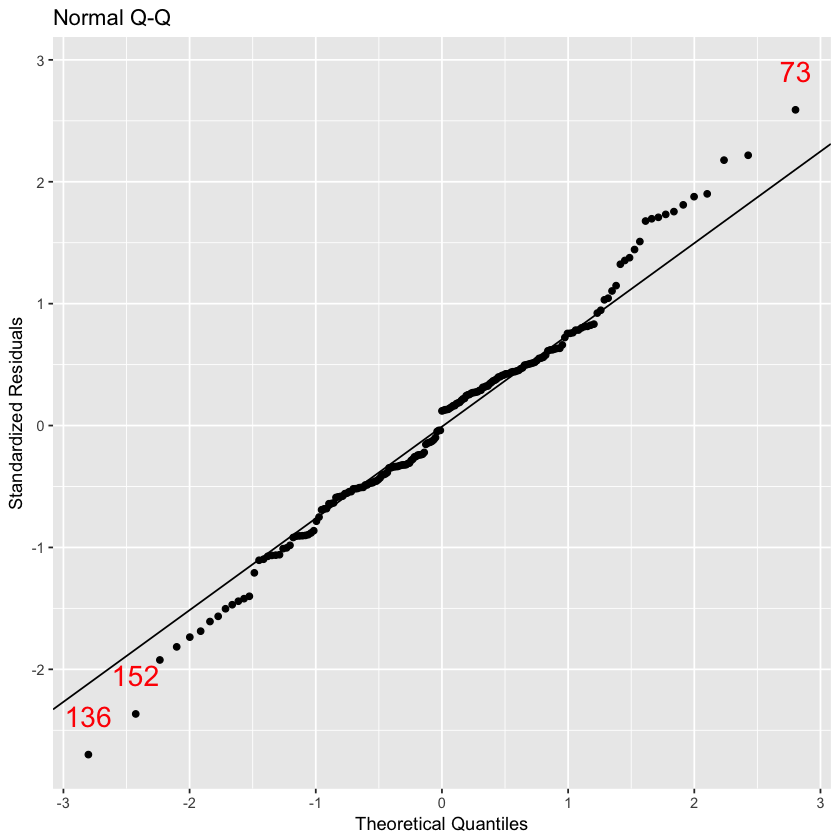

In [29]:
mplot(model, which = 2, system = "ggplot2")

$3$. If scores are normally distributed with a mean of 42 and a standard deviation of 8, what percent of the scores is: 

(a) greater than 25? <br>
**0.98**


(b) smaller than 31? <br>
**0.085**

(c) between 25 and 31? <br>
**0.06777**


In [32]:
mean <- 42
std <- 8

In [33]:
pnorm(25, mean, std, lower.tail=FALSE)

[1] 0.9832067

In [34]:
pnorm(31, mean, std, lower.tail=TRUE)

[1] 0.08456572

In [37]:
1 - pnorm(31, mean, std, lower.tail=FALSE) - pnorm(25, mean, std, lower.tail=TRUE)

[1] 0.06777242

In [166]:
# Plot as a reference
x <- c(20:70)
dist <- dnorm(x, mean, std)
#plot(x, dist)

$4$. From the following table:
![title](table1.png)

a. Apply the appropiate tests to evaluate the null hypothesis that there is no difference in the noise values means at different vehicle sizes. 

b. Examine all assumptions related to the test and make sure that the data follows all of those assumptions.

In [54]:
# idx <- c()
noise.value <- c(810, 820, 820, 835, 835, 835,
                 840, 840, 840, 845, 855, 850,
                 785, 790, 785, 760, 760, 770)
size <- c('s', 's', 's', 's', 's', 's',
          'm', 'm', 'm', 'm', 'm', 'm',
           'l', 'l', 'l', 'l', 'l', 'l')

In [59]:
df<- data.frame(size=size, noise=noise.value)
head(df)

size,noise
s,810
s,820
s,820
s,835
s,835
s,835


### a. ANSWER: This low p value shows that there is a correlation between size and noise value.

In [60]:
res.aov <- aov(noise ~ size, data=df)
summary(res.aov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
size         2  15703    7851   70.49 2.36e-08 ***
Residuals   15   1671     111                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### b. Assumptions

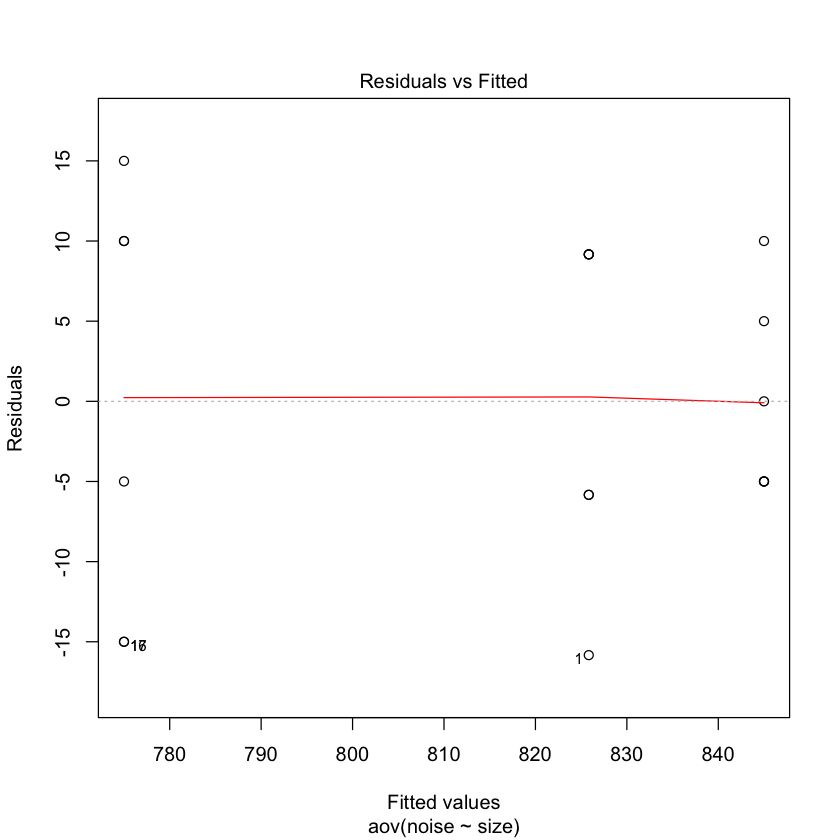

In [70]:
# Check the homogeneity of variance assumption
plot(res.aov, 1)

In [71]:
# This p value suggests that the variance across groups is not statistically significant
library(car)
leveneTest(noise ~ size, data = df)

Warning message:
“package ‘car’ was built under R version 3.4.3”
Attaching package: ‘car’

The following objects are masked from ‘package:mosaic’:

    deltaMethod, logit

The following object is masked from ‘package:dplyr’:

    recode



,Df,F value,Pr(>F)
group,2,3.5,0.05656064
,15,NA,NA


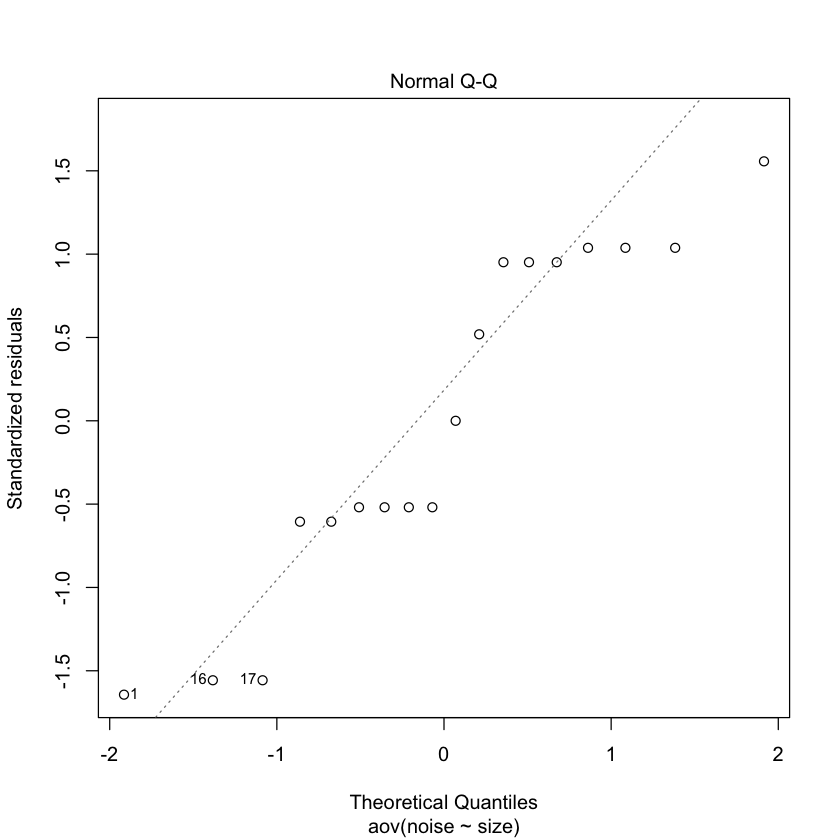

In [88]:
# 2. Check normality assumption
# Not very many samples, but overall seems to roughly fit
plot(res.aov, 2)

$5$. The Central Limit Theorem states that as we increase our sample size sufficiently, the mean of all samples drawn from the population will be approximately equal to the mean of the population.

a. True

b. False

**ANSWER:**
**True**

$6$. Consider the following scenario: A data scientist has been asked to conduct a research on the effect of a treatment on anorexia patients. The data corresponded to weight change data for young female anorexia patient. The data contain three columns:


- treat: Factor of three levels: "Cont" (control), "CBT" (Cognitive Behavioural treatment) and "FT" (family treatment).
- Prewt: Weight of patient before study period, in lbs.
- Postwt:Weight of patient after study period, in lbs.

A. Is there a difference between the mean female patiente weights before and after the study across all treatments?

**ANSWER: There is only a significant difference between patient weights with the Family Treatment group (p=0.005).**

In [47]:
library(MASS)
attach(anorexia)
head(anorexia)


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



Treat,Prewt,Postwt
Cont,80.7,80.2
Cont,89.4,80.1
Cont,91.8,86.4
Cont,74.0,86.3
Cont,78.1,76.1
Cont,88.3,78.1


In [77]:
# High value, difference not significantly different
t.test(anorexia[anorexia$Treat == 'Cont',]$Prewt, anorexia[anorexia$Treat == 'Cont',]$Postwt)


	Welch Two Sample t-test

data:  anorexia[anorexia$Treat == "Cont", ]$Prewt and anorexia[anorexia$Treat == "Cont", ]$Postwt
t = 0.30918, df = 48.385, p-value = 0.7585
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.475824  3.375824
sample estimates:
mean of x mean of y 
 81.55769  81.10769 


In [81]:
# p-value still above 0.05
t.test(anorexia[anorexia$Treat == 'CBT',]$Prewt, anorexia[anorexia$Treat == 'CBT',]$Postwt)


	Welch Two Sample t-test

data:  anorexia[anorexia$Treat == "CBT", ]$Prewt and anorexia[anorexia$Treat == "CBT", ]$Postwt
t = -1.677, df = 44.931, p-value = 0.1005
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.6183919  0.6045988
sample estimates:
mean of x mean of y 
 82.68966  85.69655 


In [82]:
# Low p-value, statistically significant
t.test(anorexia[anorexia$Treat == 'FT',]$Prewt, anorexia[anorexia$Treat == 'FT',]$Postwt)


	Welch Two Sample t-test

data:  anorexia[anorexia$Treat == "FT", ]$Prewt and anorexia[anorexia$Treat == "FT", ]$Postwt
t = -3.0414, df = 25.986, p-value = 0.005324
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -12.17472  -2.35469
sample estimates:
mean of x mean of y 
 83.22941  90.49412 


$7$. In Hypothesis testing, the critical region is the probability that the test statistic equals the observed value or a more extreme value under the assumption that the null hypthothesis is true.

a. True

b. False

** ANSWER: True. If the value lies in this critical region, we will reject the null hypothesis.**

$8$. The following data reports the calorie content of beef hot dogs. Here are the numbers of calories of a random sample of 20 different hot dogs:

186, 181, 176, 149, 184, 190, 158, 139, 175, 148, 152, 111, 141, 153, 190, 157, 131, 149, 135, 132.

Assume that these numbers are the observed values from a random sample of twenty independent normal random variables with mean μ and variance σ2, both unknown. Find the 90% confidence intervals for the mean number of calories μ.

**ANSWER:**

**mean = 156.86**

**lower = 148.52**

**upper = 165.18**

In [83]:
hot.dogs <- c(186, 181, 176, 149, 184, 190, 158, 139, 175, 148, 152, 111, 141, 153, 190, 157, 131, 149, 135, 132)

In [85]:
meanconfint = function (x, level = 0.95, ...) {
  sigma = sd(x)
  se = sigma / sqrt(length(x))
  mu = mean(x)
  z = qnorm(1 - (1 - level)/2)
  out = c(mu, mu - z * se, mu + z * se)
  names(out) = c("mean", "lower", "upper")
  return(out)
}

In [87]:
meanconfint(hot.dogs, .90)

mean    lower    upper 
156.8500 148.5223 165.1777

$9$. Which type of predictor variables can be included in a General Linear Model

a. Logistic

b. Normal

c. Categorical

d. continuous

e. Mixed


**ANSWER: Mixed**

$10$. The dataset anscombe.txt represent 4 different datasets constructed by Anscombe in 1973. The x and y variables are matched to each dataset respectively (e.g. x1 corresponds to y1, etc). Produce a Simple linear regression for each dataset (write the linear equation for each model), generate residuals plots, and discuss which is the most appropiate model from the 4 datasets and why.

### **ANSWERS**
- **Set 1.** y =  3.0001 x +  0.5001 . A linear regression is a good model for this set. Plotting it shows a clear linear relationship between the two variables without any outliers.
 
- **Set 2.** y =  3.0009 x +  0.5 . A quadratic transformation might be a better fit for this set, as it is curved and not a purely linear relationship, although there is clearly a relationship between the variables.

- **Set 3.** y =  3.0025 x +  0.4997 . A linear regression would work well for this, but the outlier should first be removed.

- **Set 4.** y =  3.0017 x +  0.4999 . There is no correlation between these models, so it is not appropriate to fit them in any way.

In [161]:
ansc = read.table(file = "anscombe.txt", stringsAsFactors = F, header = TRUE)
head(ansc)

case,x1,x2,x3,x4,y1,y2,y3,y4
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47
6,14,14,14,8,9.96,8.10,8.84,7.04


[1] "Linear Equation: "
[1] "y =  3.0001 x +  0.5001"
[1] ""


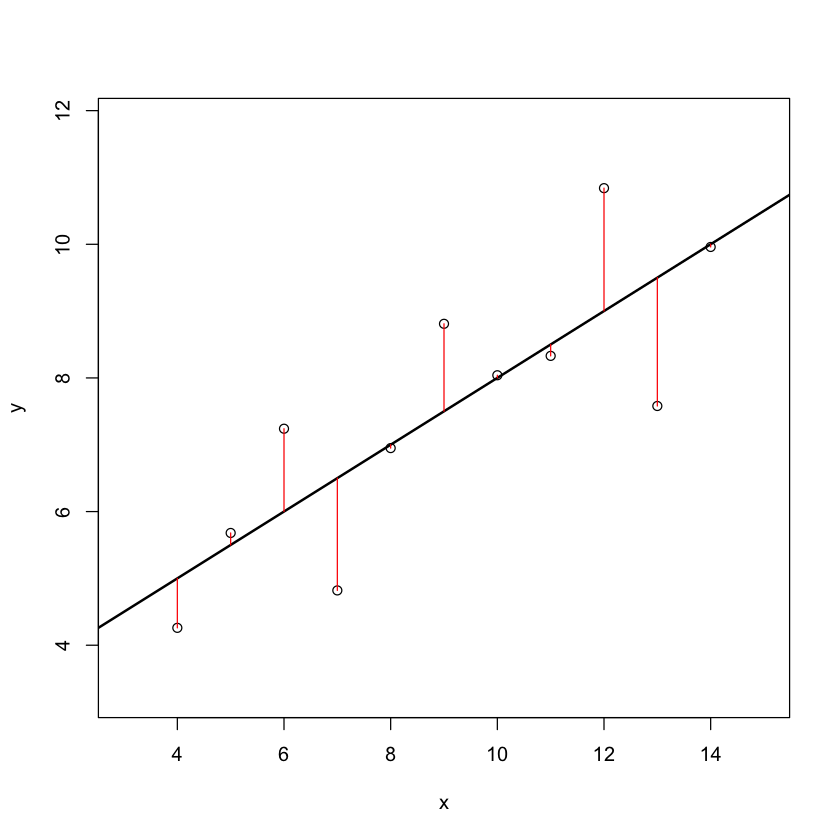

In [162]:
library(calibrate)

analyze_data <- function(x, y) {
    # Produce linear regression
    model <- lm(y ~ x)
#     print(model)
    
    cf <- round(coef(model), 4)
    
    print("Linear Equation: ")
    print(paste("y = ", cf[1], "x + ",  cf[2]))
    print("")
    
    # Residual Plot
    # calculate residuals and predicted values
    plot(x, y, xlim=c(min(x)-1, max(x)+1), ylim=c(min(y)-1, max(y)+1))
    abline(model, lwd=2)
    res <- signif(residuals(model), 5)
    pre <- predict(model) # plot distances between points and the regression line
    segments(x, y, x, pre, col="red")
#     textxy(x, y, res, cex=0.7)
    
}
analyze_data(ansc$x1, ansc$y1)

[1] "Linear Equation: "
[1] "y =  3.0009 x +  0.5"
[1] ""


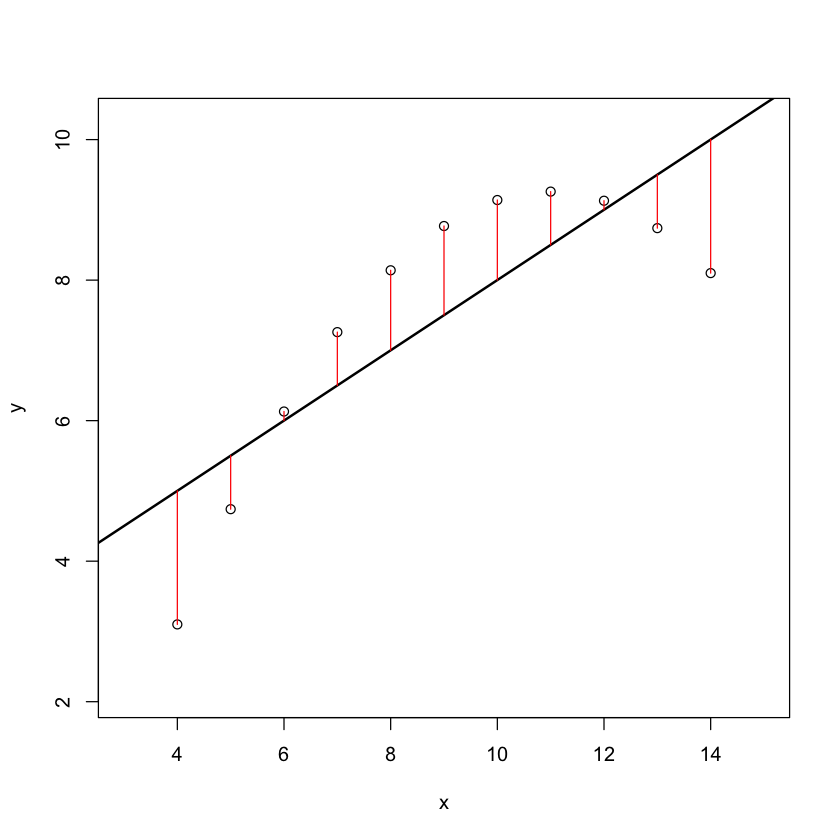

In [163]:
analyze_data(ansc$x2, ansc$y2)

[1] "Linear Equation: "
[1] "y =  3.0025 x +  0.4997"
[1] ""


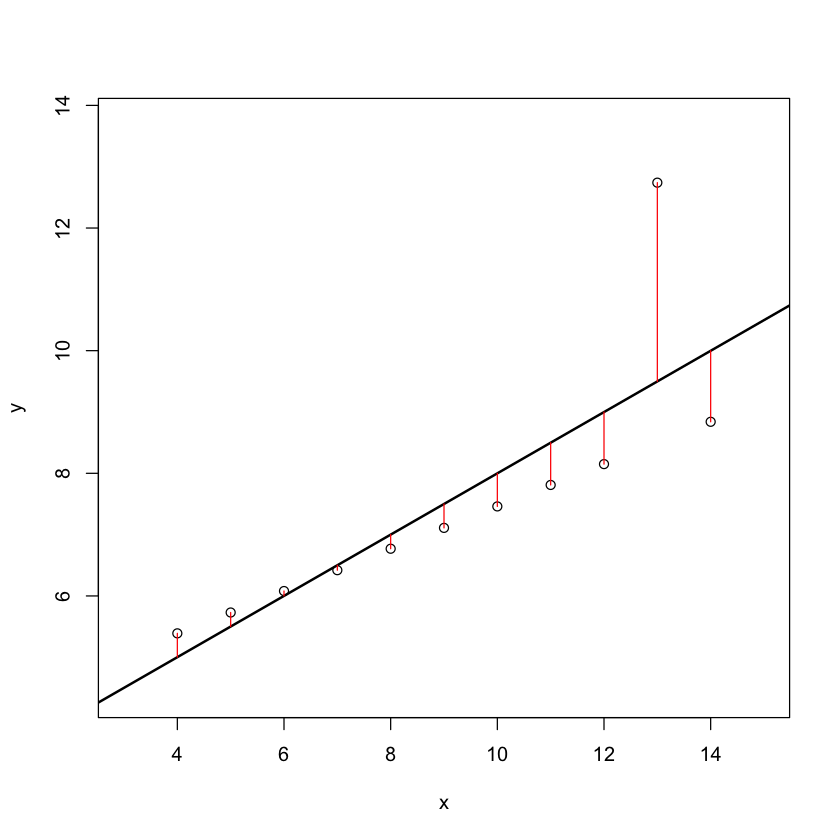

In [164]:
analyze_data(ansc$x3, ansc$y3)

[1] "Linear Equation: "
[1] "y =  3.0017 x +  0.4999"
[1] ""


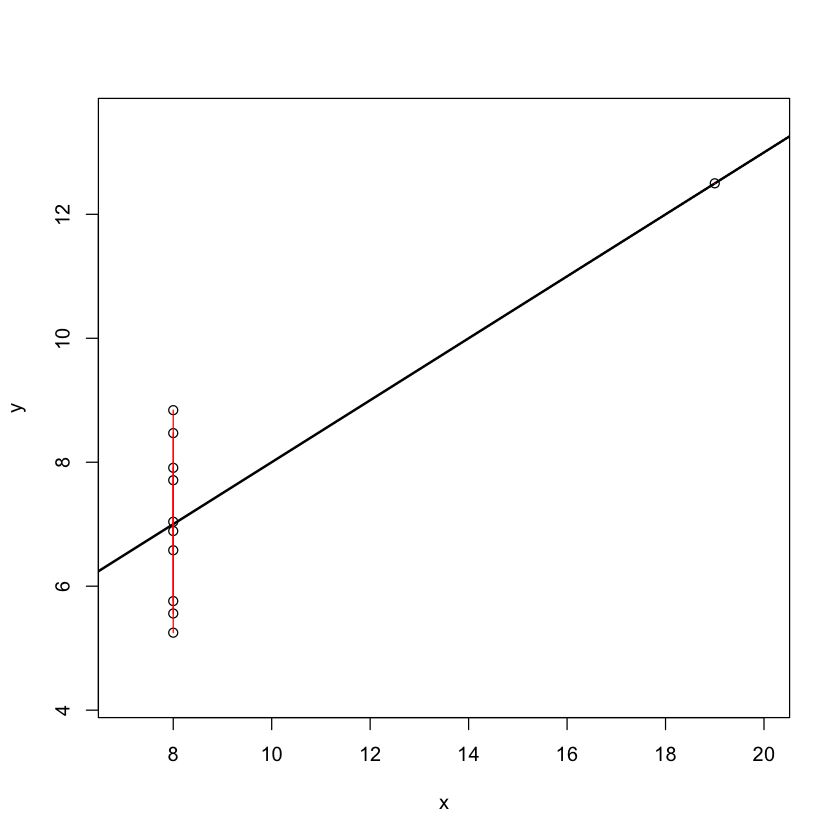

In [165]:
analyze_data(ansc$x4, ansc$y4)